In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

In [48]:
diamonds = pd.read_csv('diamonds.csv')
rdiamonds = pd.read_csv('rick_diamonds.csv')

# Exploratory data analysis

In [33]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [34]:
rdiamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [35]:
rdiamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [36]:
diamonds['clarity'].unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

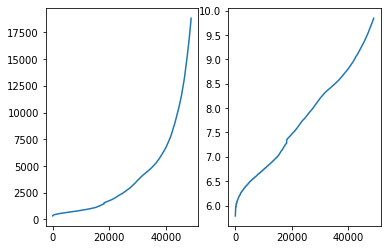

In [37]:
fig,ax=plt.subplots(1,2)
ax[0].plot(diamonds['price'].sort_values().reset_index(drop=True))
ax[1].plot(np.log(diamonds['price'].sort_values().reset_index(drop=True)))

# Data cleaning

In [38]:
diamonds['cut']=diamonds['cut'].map({'Fair':'1','Ideal':'2','Good':'3','Very Good':'4','Premium':'5'})
diamonds['cut']=diamonds['cut'].astype(int)

#alteração diamonds rick
rdiamonds['cut']=rdiamonds['cut'].map({'Fair':'1','Ideal':'2','Good':'3','Very Good':'4','Premium':'5'})
rdiamonds['cut']=rdiamonds['cut'].astype(int)

In [39]:
diamonds['color']=diamonds['color'].map({'J':'1','I':'2','H':'3','G':'4','F':'5','E':'6','D':'7'})
diamonds['color']=diamonds['color'].astype(int)

rdiamonds['color']=rdiamonds['color'].map({'J':'1','I':'2','H':'3','G':'4','F':'5','E':'6','D':'7'})
rdiamonds['color']=rdiamonds['color'].astype(int)

In [40]:
diamonds['clarity']=diamonds['clarity'].map({'I1':'1','SI2':'2','SI1':'3','VS2':'4','VS1':'5','VVS2':'6','VVS1':'7', 'IF':'8'})
diamonds['clarity']=diamonds['clarity'].astype(int)

rdiamonds['clarity']=rdiamonds['clarity'].map({'I1':'1','SI2':'2','SI1':'3','VS2':'4','VS1':'5','VVS2':'6','VVS1':'7', 'IF':'8'})
rdiamonds['clarity']=rdiamonds['clarity'].astype(int)

In [41]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='price'>

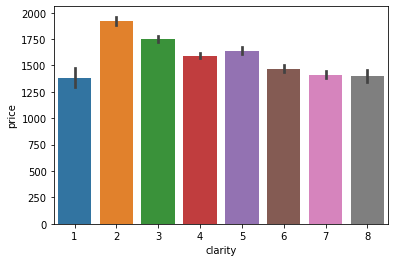

In [42]:
sns.barplot('clarity','price', data=diamonds.query('carat < 1'))

# Predictions

In [43]:
#pricemean = diamonds['price'].mean()
#rdiamonds['price_predicted'] = pricemean
#Your root mean squared error is 3980.713882502374

#X = diamonds[['carat']]
#y = diamonds['price']
#model = LinearRegression()
#model.fit(X,y)
#model.predict(rdiamonds[['carat']])
#rdiamonds['price_predicted'] = model.predict(rdiamonds[['carat']])
#Your root mean squared error is 1605.15175707362 

lista = ['carat', 'cut', 'color', 'clarity', 'depth', 'table']

X = diamonds[lista]
y = diamonds['price']

X = np.log(X)
y = np.log(y)

model = LinearRegression()
model.fit(X,y)

rdiamonds['price_predicted'] = model.predict(np.log(rdiamonds[lista]))
rdiamonds['price_predicted']=np.exp(rdiamonds['price_predicted'])

rdiamonds['price_predicted']=np.where(rdiamonds['price_predicted']<diamonds['price'].min(), diamonds['price'].min(), rdiamonds['price_predicted'])

In [44]:
lista = ['carat', 'cut', 'color', 'clarity', 'depth', 'table']

X = diamonds[lista]
y = diamonds['price']

X_std = (X - X.mean())/X.std()
X_rick = (rdiamonds[lista] - rdiamonds[lista].mean())/rdiamonds[lista].std()

model = KNeighborsRegressor()
model.fit(X_std,y)

rdiamonds['price_predicted'] = model.predict(X_rick)
rdiamonds['price_predicted'] = rdiamonds['price_predicted']

rdiamonds['price_predicted']=np.where(rdiamonds['price_predicted']<diamonds['price'].min(), diamonds['price'].min(), rdiamonds['price_predicted'])

In [45]:
a=mean_squared_error(diamonds['price'], model.predict(X_std))
a**(1/2)

639.2563337250567

# Save CSV

In [46]:
rdiamonds.to_csv('resposta.csv', index=False)